# Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed. There are multiple ways to calculate similarity between clusters. In this project we used 2 ways-
#### 1) Single Linkage (MIN)
#### 2) Complete Linkage (MAX)

In [1]:
import numpy as np
import pandas as pd
from math import sqrt

In [2]:
dataset = pd.read_csv('india-basemap/data_clubbed.csv', header=None)
dataset.head()
states = dataset[0]
dataset.drop(0, inplace=True, axis=1)
dataset.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0


### Year-wise Clustering Analysis

We perform year-wise clustering analysis for all states. To find the clusters for a particular based on their crime records, specify the year in the 'year' variable

In [3]:
year = 2014
year_list = []
start_range = 0
for i in range(len(dataset)):
    if dataset[1].loc[i] == year:
        start_range = i
        break

end_range = 0   
for i in range(len(dataset)):
    if dataset[1].loc[i] == year:
        end_range += 1
end_range = end_range + start_range
dataset.drop(1, inplace=True, axis=1)
for i in range(start_range, end_range+1):
    year_list.append(dataset.loc[i])

### Step 1 - Distance Matrix
Euclidean Distance is used to calculate the similarity between 2 rows of the dataset. This is used to create the distance matrix.

In [4]:
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(0,11):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

### Step 2 - Smallest Value

The smallest value in the upper triangle of the distance matrix is used to find the smallest distance between 2 cluster.

In [5]:
def smallest_val(arr, clusters, n, linkage):
    smallest = 10**9
    small_i = 0
    small_j = 0
    for i in range(0, n):
        for j in range(i+1, n):
            if arr[i][j] < smallest:
                smallest = arr[i][j]
                small_i = i
                small_j = j
    update_matrix(arr, clusters, small_i, small_j, n, linkage)
    #print(arr)
    return smallest

### Step 3 - Update the distance matrix

The distance matrix is updated according to the linkage specified in the argument. The 2 different linkages are -
- Single Linkage - Sim(C1,C2) = Min Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2
- Complete Linkage - im(C1,C2) = Max Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2

In [6]:
def update_matrix(arr, clusters, i, j, n, linkage):
    temp_list = []
    temp_list.append(i)
    temp_list.append(j)
    temp_list.append(arr[i][j])
    clusters.append(temp_list)
    print('Merged' , i, j, 'with distance', arr[i][j])
    for a in range(0, n):
        for b in range(a+1, n):
            if ((a == i) and (b != j)) or ((a == j) and (b != i)):
                if linkage == 'single':
                    arr[a][b] = min(arr[i][b], arr[j][b])
                    arr[b][a] = min(arr[i][b], arr[j][b])
                elif linkage == 'complete':
                    arr[a][b] = max(arr[i][b], arr[j][b])
                    arr[b][a] = max(arr[i][b], arr[j][b])
            elif ((a != i) and (b == j)) or ((a != j) and (b == i)):
                if linkage == 'single':
                    arr[a][b] = min(arr[a][i], arr[a][j])
                    arr[b][a] = min(arr[a][i], arr[a][j])
                elif linkage == 'complete':
                    arr[a][b] = max(arr[a][i], arr[a][j])
                    arr[b][a] = max(arr[a][i], arr[a][j])
    for a in range(0, n):
        arr[i][a] = 10**9
        arr[a][i] = 10**9
    

In [7]:
data = dataset.values.tolist()
n = end_range - start_range 
arr = [[0 for i in range(n)] for j in range(n)]
for i in range(start_range, end_range):
    for j in range(i+1, end_range):
        arr[i-start_range][j-end_range] = euclidean_distance(data[i],data[j])
        arr[j-end_range][i-start_range] = euclidean_distance(data[i],data[j])

### Step 4 - Find the clusters using DFS

The connected components i.e the clusters are found by creating a graph and finding the connect components using DFS.

In [8]:
class Graph: 
    def __init__(self,V): 
        self.V = V 
        self.adj = [[] for i in range(V)] 

    def DFSUtil(self, temp, v, visited): 
        visited[v] = True
        temp.append(v) 
        for i in self.adj[v]: 
            if visited[i] == False: 
                temp = self.DFSUtil(temp, i, visited) 
        return temp 

    def addEdge(self, v, w): 
        self.adj[v].append(w) 
        self.adj[w].append(v) 

    def connectedComponents(self): 
        visited = [] 
        cc = [] 
        for i in range(self.V): 
            visited.append(False) 
        for v in range(self.V): 
            if visited[v] == False: 
                temp = [] 
                cc.append(self.DFSUtil(temp, v, visited)) 
        return cc

### Results -

- Using elbow method we found that 10 clusters yield the best results for this dataset
- After finding the first 10 clusters, we perform a demographic survey of the data
- The states that fall into the same cluster have similar crime patterns i.e the number and type of crimes
- It is noticed that all the coastal states like Lakshadweep, Andaman and Nicobar Islands, Daman & Diu and D&N haveli fall into the same cluster very often
- Another observation is that most of the Northeastern states fall into the same cluster

In [9]:
g = Graph(n);
linkage = 'complete'
clusters = []
labelList = []
for cnt in range(0,n-1):
    val = smallest_val(arr, clusters, n, linkage)
    for i in range(0,len(clusters)):
        g.addEdge(clusters[i][0], clusters[i][1]) 
    cc = g.connectedComponents() 
    if len(cc) == 10:
        print('\n')
        for i in range(0, len(cc)):
            temp_states = []
            for j in range(0, len(cc[i])):
                temp_states.append(states[cc[i][j]])
            print("Cluster "+ str(i)+" :"+ str(temp_states))
            labelList.append(" ".join(temp_states))
        break

Merged 31 32 with distance 6.0
Merged 1 15 with distance 8.774964387392123
Merged 32 34 with distance 13.0
Merged 18 35 with distance 15.748015748023622
Merged 9 30 with distance 17.175564037317667
Merged 29 35 with distance 27.331300737432898
Merged 34 35 with distance 54.42425929675111
Merged 16 17 with distance 63.324560795950255
Merged 15 22 with distance 68.97100840208152
Merged 10 25 with distance 75.40557008603542
Merged 8 27 with distance 86.19164692706596
Merged 5 25 with distance 117.56700217322886
Merged 17 22 with distance 125.80540528928
Merged 22 30 with distance 170.06469357276953
Merged 25 27 with distance 226.48399501951567
Merged 30 35 with distance 254.75478405713994
Merged 20 24 with distance 312.9632566292727
Merged 0 19 with distance 453.1478787327598
Merged 19 24 with distance 530.347998959174
Merged 27 35 with distance 566.5439082719008
Merged 7 23 with distance 709.052184257266
Merged 4 21 with distance 729.0596683399789
Merged 12 23 with distance 826.305028424

In [10]:
labelList

['andhra pradesh odisha tripura punjab tamil nadu haryana kerala',
 'arunachal pradesh manipur sikkim mizoram meghalaya d&n haveli jammu & kashmir andhra pradesh nagaland chandigarh puducherry delhi daman & diu west bengal himachal pradesh uttar pradesh jharkhand goa',
 'assam',
 'bihar',
 'chhattisgarh rajasthan karnataka gujarat',
 'madhya pradesh',
 'maharashtra',
 'uttarakhand',
 'a&n islands',
 'lakshadweep']

### Cross-checking the results

The scipy library is used to cross-check the results and to get a dendogram for the data

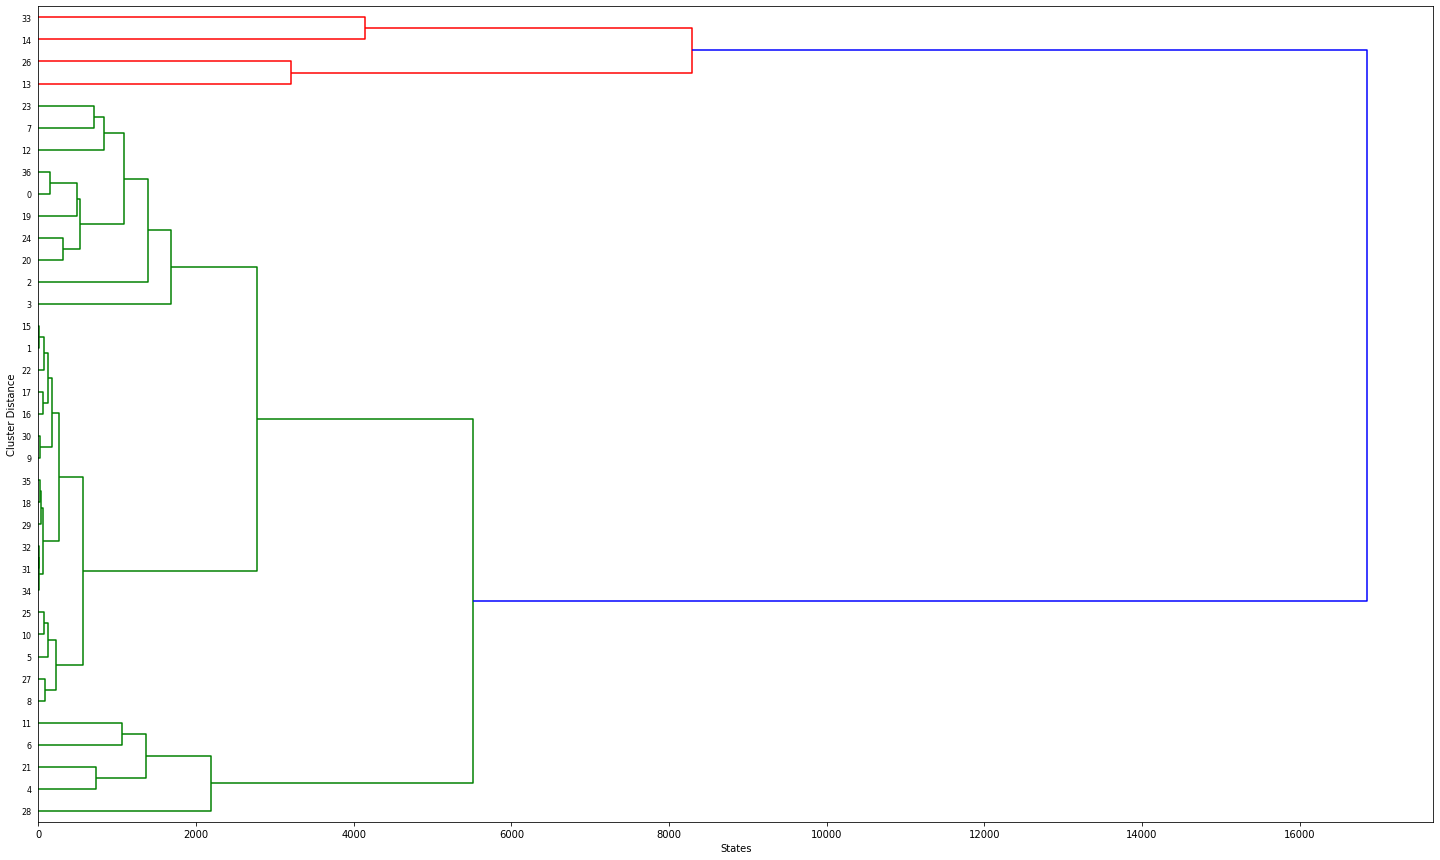

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
X = np.array(year_list)
Z = linkage(X, 'complete')
fig = plt.figure(figsize=(25, 15))
plt.xlabel('States')
plt.ylabel('Cluster Distance')
dn = dendrogram(Z, orientation='right')